<a href="https://colab.research.google.com/github/JohnYechanJo/Medical-Image-AI/blob/main/Medical_Image_Data_Preparation_and_Collection/Pathology_image_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-5build1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


## Introudction
Pathology를 읽어오기 위해서는 Openslide라는 라이브러리를 사용하게 됩니다. \\
https://openslide.org/

dataset:
https://portal.gdc.cancer.gov/

In [ ]:
import os
from pathlib import Path
from openslide import OpenSlide
from pprint import pprint
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_PATH = Path('/content/drive/MyDrive/FastCampus/pathology_img')
path_img_path = list(BASE_PATH.glob('*/*'))[0]

In [ ]:
slide = OpenSlide(path_img_path)

In [ ]:
slide

OpenSlide(PosixPath('/content/drive/MyDrive/FastCampus/pathology_img/bdc28684-e4ce-4fdb-9833-632cb9bfb5aa/TCGA-EJ-7782-01A-01-TS1.f0921308-6e5d-4392-8023-9882d915be80.svs'))

In [ ]:
def show_path_info(slide):
    print("Patient's dimentsions..:",slide.dimensions)
    print("Patient's z level......:",slide.level_count)
    print("Patient's z dimentsion.:",slide.level_dimensions)


print(f"file size: {round(os.path.getsize(path_img_path) / 1024 ** 2, 2)} MB")
show_path_info(slide)

file size: 319.2 MB
Patient's dimentsions..: (69065, 68679)
Patient's z level......: 4
Patient's z dimentsion.: ((69065, 68679), (17266, 17169), (4316, 4292), (2158, 2146))


In [ ]:
pprint(dict(slide.properties))

{'aperio.AppMag': '40',
 'aperio.DSR ID': 'ap1546-dsr',
 'aperio.Date': '11/15/11',
 'aperio.DisplayColor': '0',
 'aperio.Exposure Scale': '0.000001',
 'aperio.Exposure Time': '109',
 'aperio.Filename': '31227',
 'aperio.Focus Offset': '0.000000',
 'aperio.ICC Profile': 'ScanScope v1',
 'aperio.ImageID': '31227',
 'aperio.Left': '42.968620',
 'aperio.LineAreaXOffset': '0.000000',
 'aperio.LineAreaYOffset': '0.000000',
 'aperio.LineCameraSkew': '-0.000389',
 'aperio.MPP': '0.2520',
 'aperio.OriginalHeight': '68779',
 'aperio.OriginalWidth': '72000',
 'aperio.ScanScope ID': 'SS1302',
 'aperio.StripeWidth': '1000',
 'aperio.Time': '16:37:56',
 'aperio.Time Zone': 'GMT-07:00',
 'aperio.Top': '21.434242',
 'aperio.User': '5ceb2363-10c8-43d9-b927-d862d87fb522',
 'openslide.comment': 'Aperio Image Library v10.2.41\r\n'
                      '72000x68779 [0,100 69065x68679] (256x256) J2K/YUV16 '
                      'Q=70|AppMag = 40|StripeWidth = 1000|ScanScope ID = '
                      '

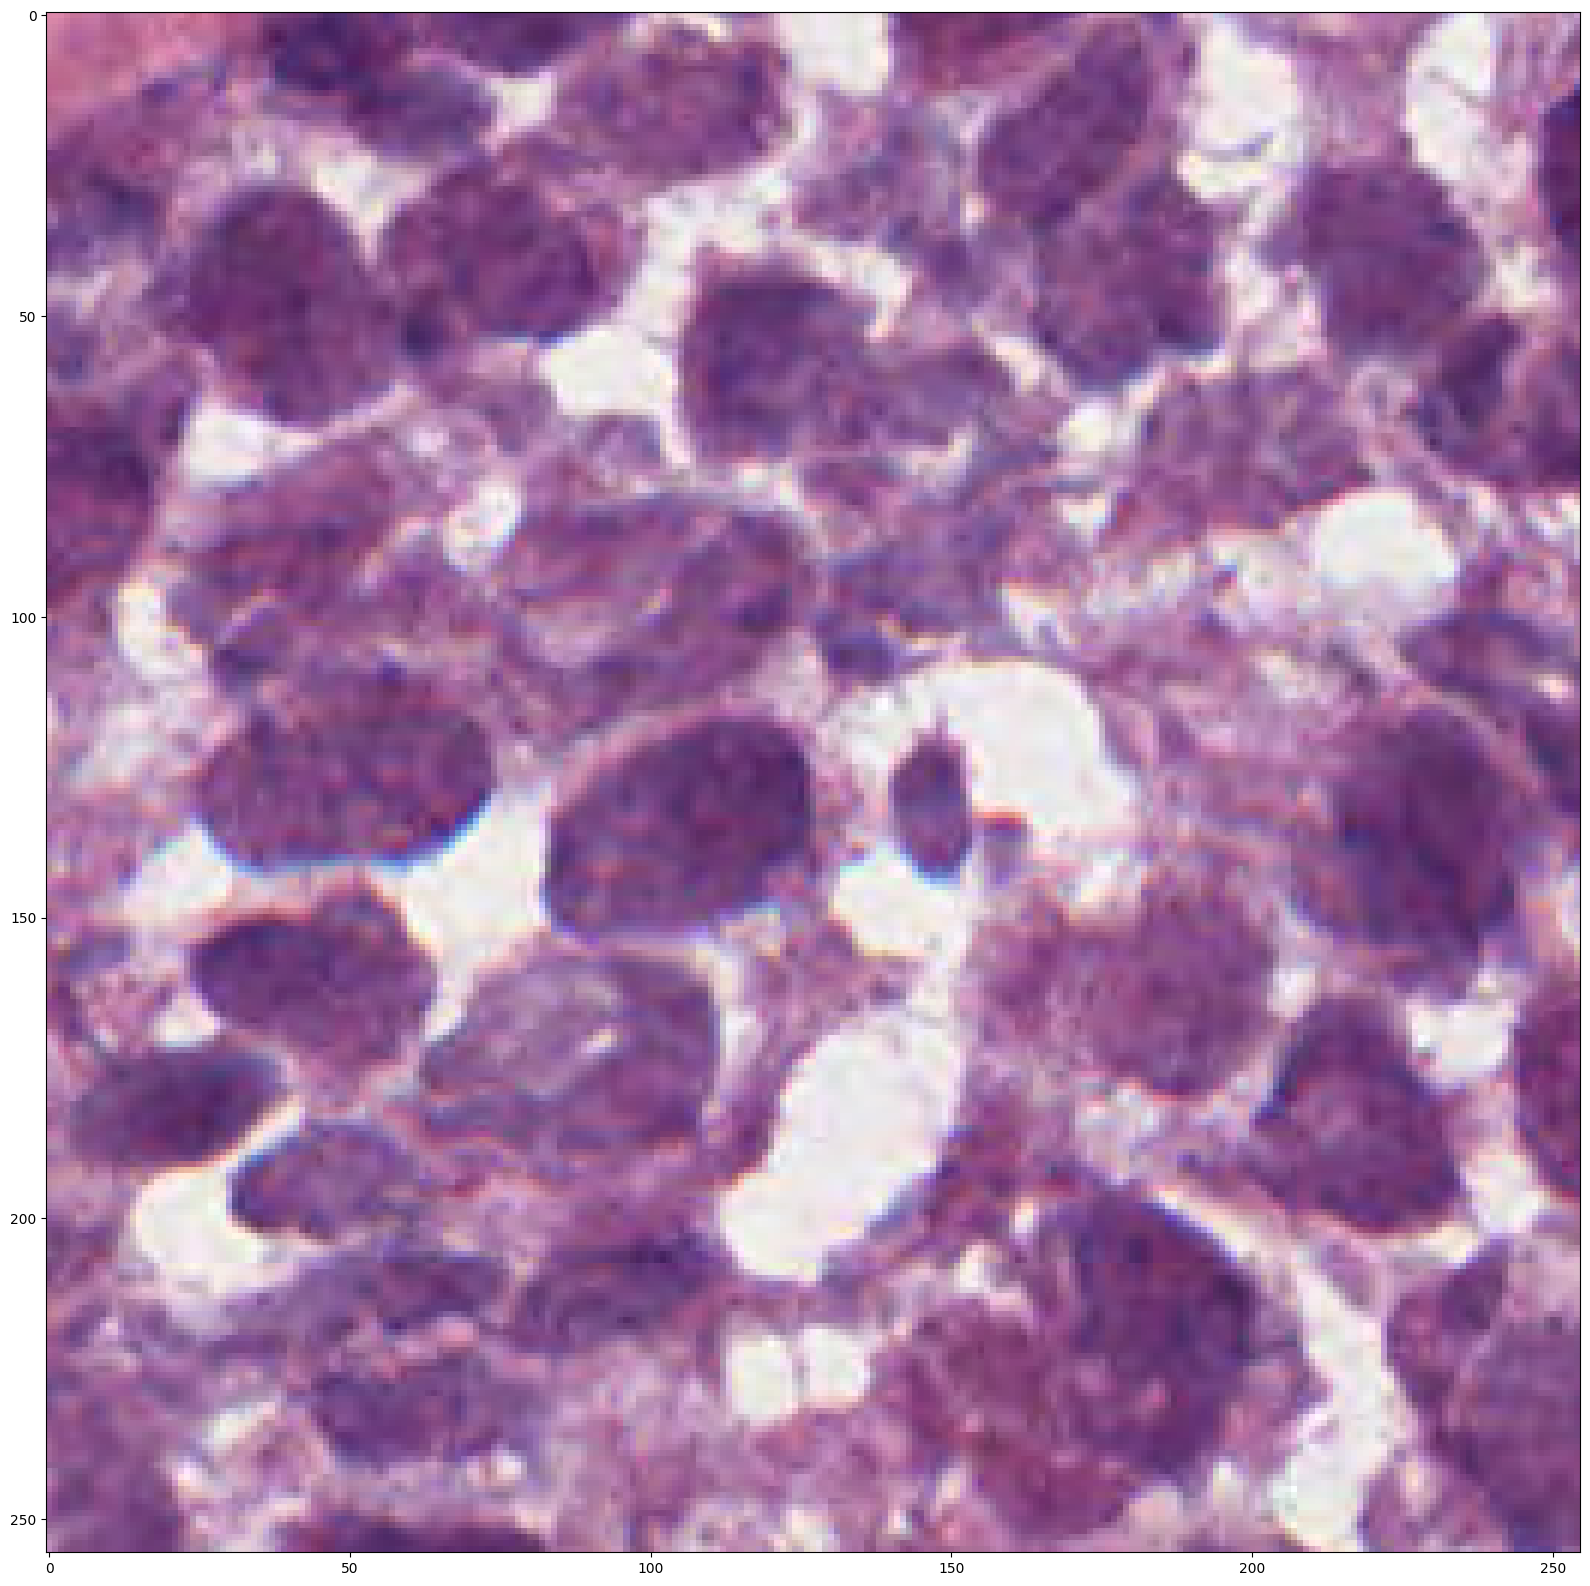

In [ ]:
region = (30000,30000) # x, y cordi
level = 0
size = (255, 256) # width , height
region = slide.read_region(region, level, size)
plt.figure(figsize=(20, 20))
plt.imshow(region)

In [ ]:
print(region.size)

(1000, 1000)


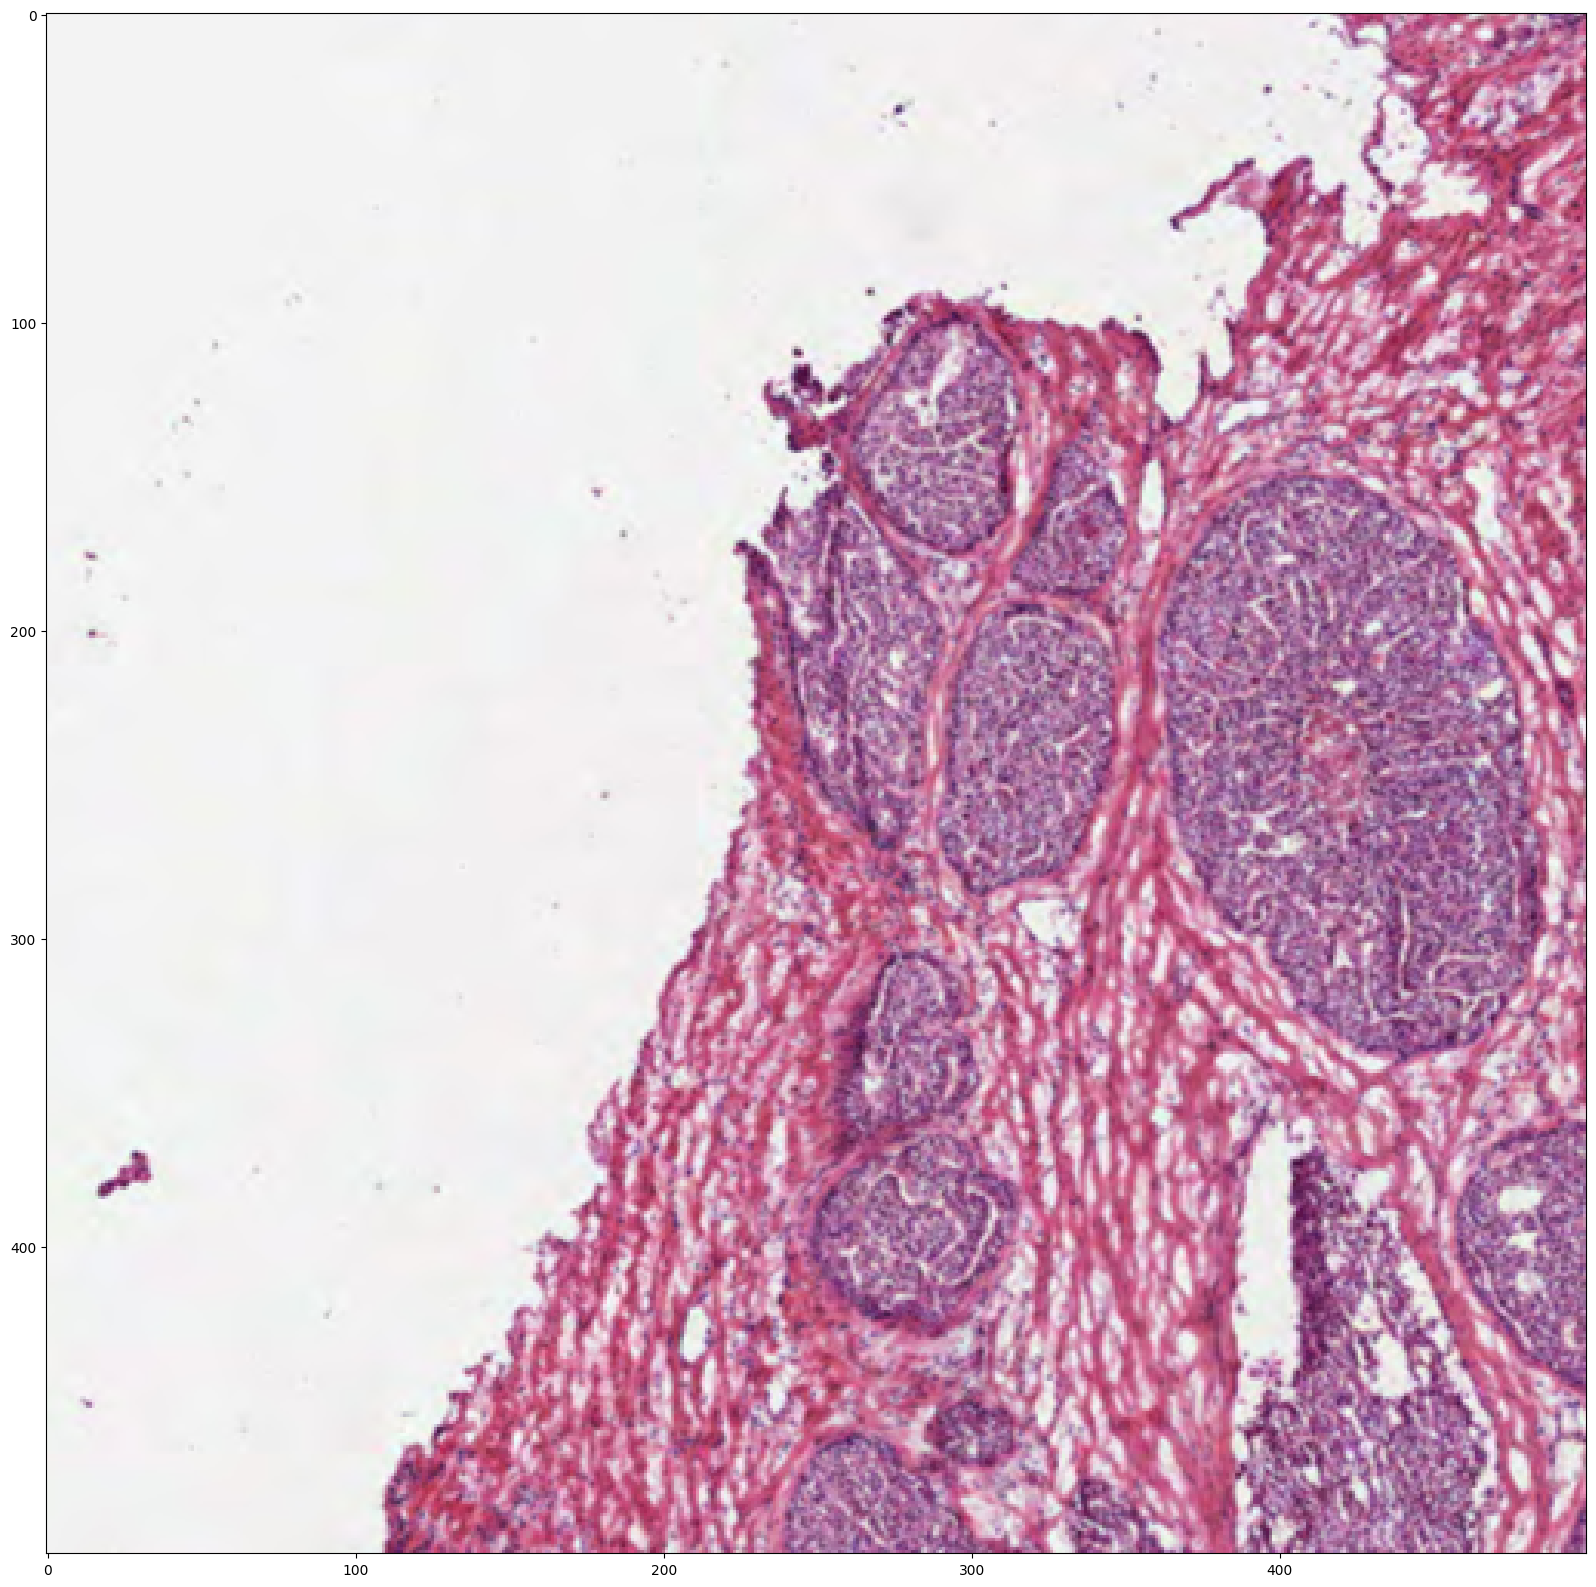

In [ ]:
region = (13000,13000)
level = 2
size = (500,500)
region = slide.read_region(region, level, size)
plt.figure(figsize=(20, 20))
plt.imshow(region)

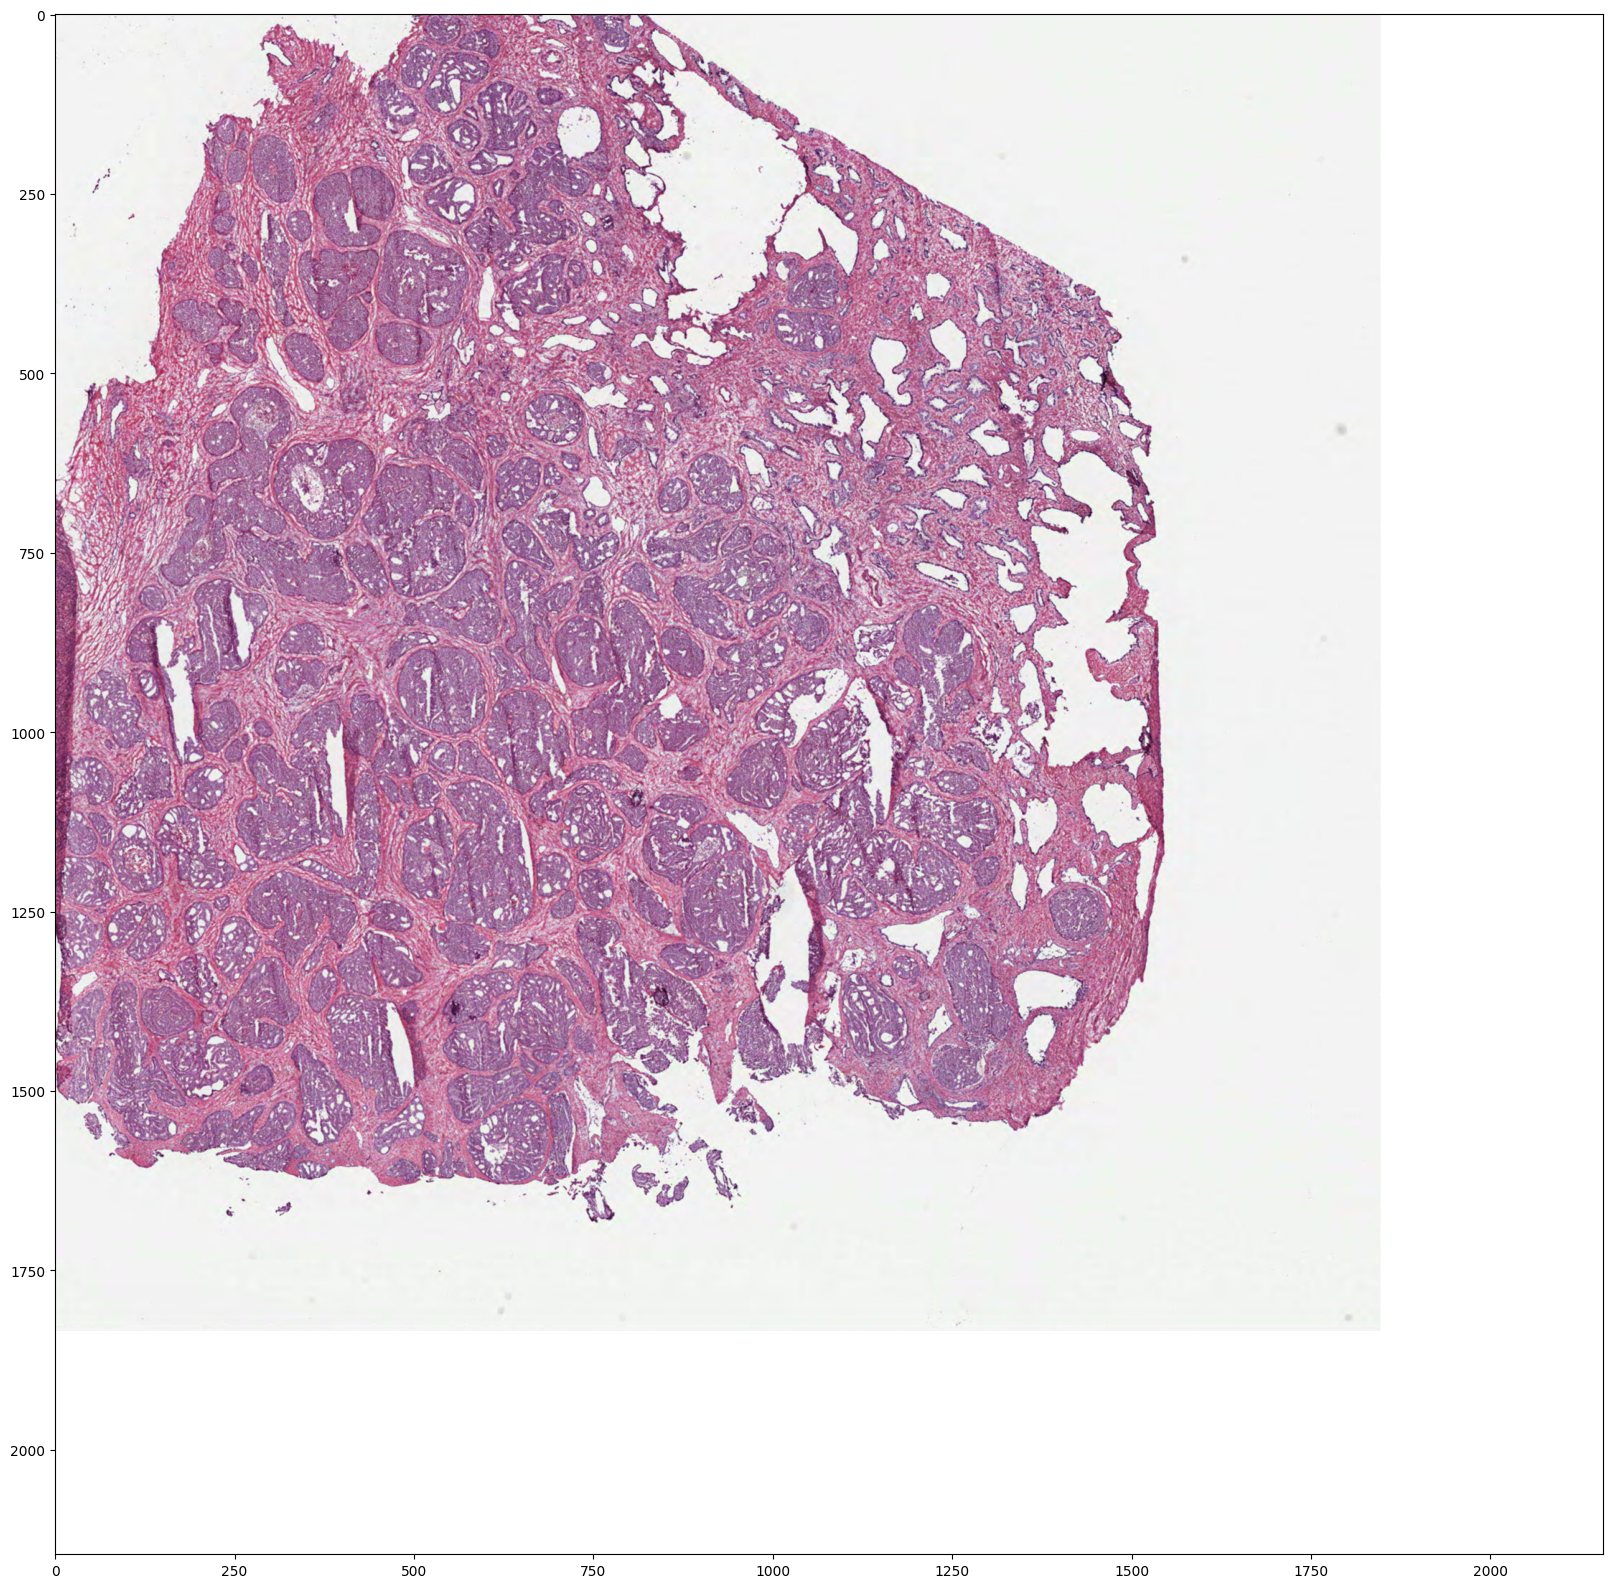

In [ ]:
region = (10000,10000)
level = 3
size = (2158, 2146)
region = slide.read_region(region, level, size)
plt.figure(figsize=(20, 20))
plt.imshow(region)